In [46]:
import numpy as np
import matplotlib.pyplot as plt
from numerik.ode import explicit_euler, implicit_euler

In [47]:
f = lambda x, y: -4*y
df = lambda x, y: -4
ya = lambda x: np.exp(-4*x)

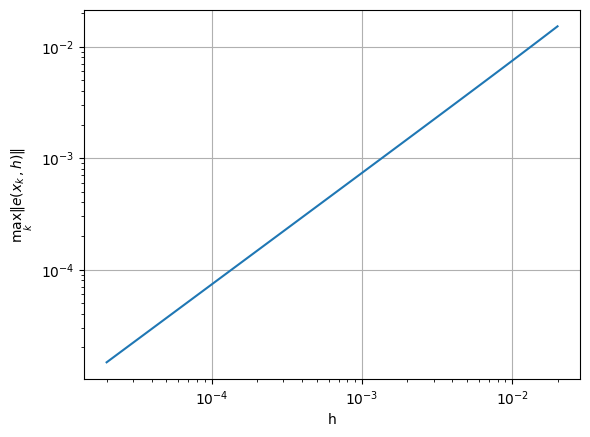

In [48]:
n = 10**np.linspace(2,5)
hs = 2/n
err = []
for h in hs:
    x, y = explicit_euler(2,h,0,1,f)
    err.append(np.linalg.norm(y-ya(x),np.inf)) # ya(x) ist die exakte Lösung

plt.loglog(hs,err,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.show()

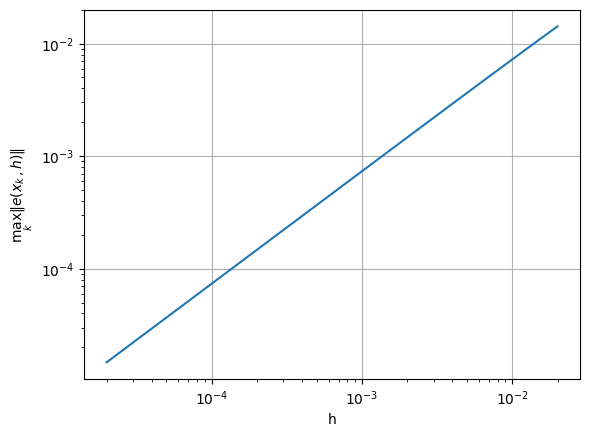

In [49]:
n = 10**np.linspace(2, 5)
hs = 2/n
err = []
for h in hs:
    x, y = implicit_euler(2,h,0,1,f, df)
    err.append(np.linalg.norm(y-ya(x),np.inf)) # ya(x) ist die exakte Lösung

plt.loglog(hs,err,'-')
plt.xlabel('h')
plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
plt.grid()
plt.show()

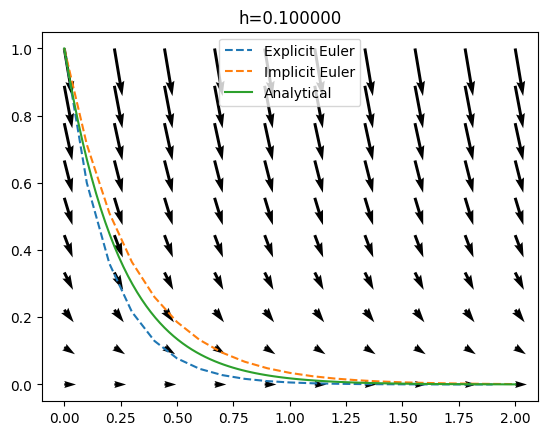

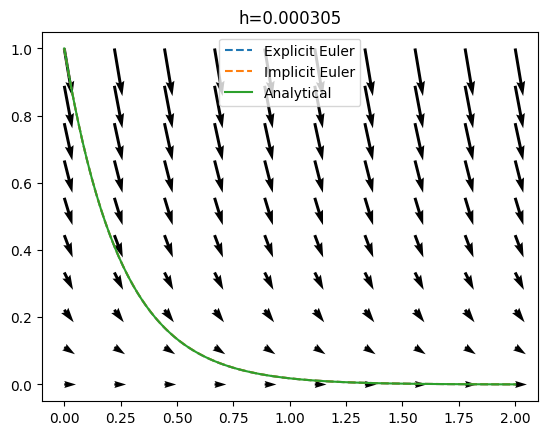

In [50]:
def plot_result(h):
    x, y = explicit_euler(2, h, 0, 1, f)
    plt.plot(x,y,'--', label="Explicit Euler")
    
    x, y = implicit_euler(2, h, 0, 1, f, df)
    plt.plot(x,y,'--', label="Implicit Euler")
    
    x = np.linspace(0, 2, 100)
    y = ya(x)
    plt.plot(x, y, label="Analytical")
    
    x = np.linspace(0, 2, 10)
    y = np.linspace(0, 1, 10)
    xv, yv = np.meshgrid(x, y)
    
    plt.quiver(xv, yv, np.ones_like(xv), f(xv, yv), angles="xy")
    
    plt.title(f"h={h:.6f}")
    plt.legend()
    plt.show()
    
plot_result(h = 0.1)
plot_result(h = 2/3**8)